# How to handle an Imbalanced dataset

Imbalanced dataset is a nice example in machine learning. It deals with the classification problem. In some special classification problems where the class distribution is not uniform among the classes, say if the majority is negative(90%) or the majority is positive(90%) then in order to balance the dataset we use two methods.

1)Under Sampling

2)Over Sampling

## Under Sampling

Under sampling refers to the technique which balance the class in a classification problem where there is imbalanced dataset.This technique removes the example from the training dataset that belong to the majority class to balance the class distribution and make the distribution ratio as 1:1.

Handling Credit Card Kaggle Imbalanced dataset

Credit card companies are able to detect the fraudelent transactions so that their consumers are not charged for the item they did not purchased.

### Context

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentially issues, we cannot provide the original features and more background information about the data. Features V1, V2,...V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction in the dataset. the feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning 

### Acknowledgement

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning group of ULB on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-with-machine-learning and the page of the DefeatFraud project.

In [3]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
plt.rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [4]:
data = pd.read_csv('creditcard.csv',sep=',')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Creating independent and dependent features
columns= data.columns.tolist()
#Filter the coloumns to remove data we do not want
columns = [c for c in columns if c not in ["class"]]
#Store the variable we are predicting
target= "Class"
#Defining random state
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
x_outliers = state.uniform(low=0, high =1, size=(X.shape[0], X.shape[1]))
#Print shapes
print(X.shape)
print(Y.shape)

(284807, 31)
(284807,)


### Data Analysis

In [8]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

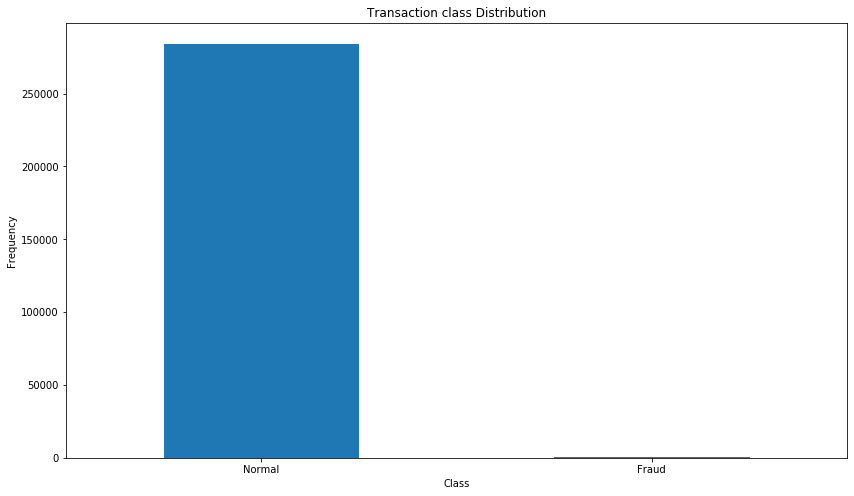

In [9]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind= 'bar', rot=0)
plt.title("Transaction class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [10]:
#Getting the fraud and normal dataset
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [11]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [12]:
from imblearn.under_sampling import NearMiss

In [84]:
#Implementing Undersampling 
nm = NearMiss()
X_res, y_res = nm.fit_sample(X,Y)

In [61]:
X_res.shape, y_res.shape

((984, 31), (984,))

In [62]:
from collections import Counter
print("Original dataset shape : {}".format(Counter(Y)))
print("Resampled dataset shape : {}".format(Counter(y_res)))

Original dataset shape : Counter({0: 284315, 1: 492})
Resampled dataset shape : Counter({0: 492, 1: 492})


## Over Sampling

Over sampling is the second method of data analysis to adjust the class distribution of the dataset. Oversampling invoves supplementing the training data with multiple copies of some of the minority classes. This methood has been proven to be robust.

The context and the acknowledgement are the same of the above mentioned under sampled dataset. I'm here also using the same dataset to show the difference.

In [63]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
plt.rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [64]:
data = pd.read_csv('creditcard.csv',sep=',')

In [65]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [67]:
#Creating independent and dependent features
columns= data.columns.tolist()
#Filter the coloumns to remove data we do not want
columns = [c for c in columns if c not in ["class"]]
#Store the variable we are predicting
target= "Class"
#Defining random state
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
x_outliers = state.uniform(low=0, high =1, size=(X.shape[0], X.shape[1]))
#Print shapes
print(X.shape)
print(Y.shape)

(284807, 31)
(284807,)


### Data Analysis

In [68]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

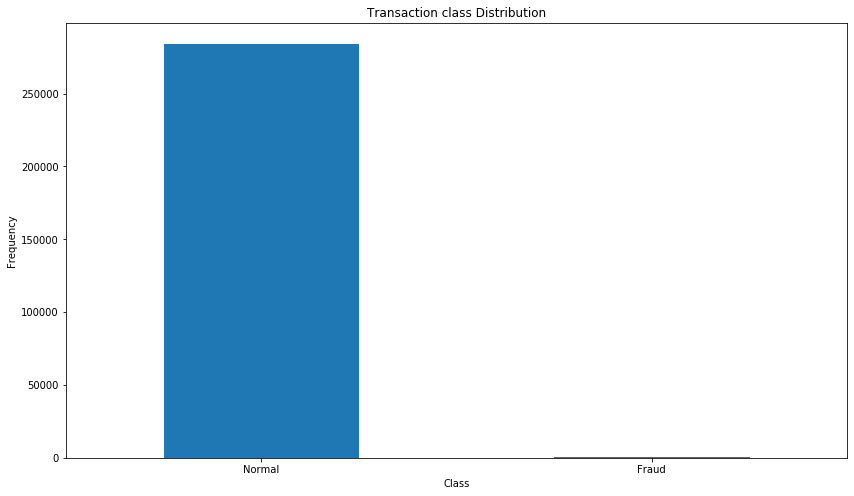

In [69]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind= 'bar', rot=0)
plt.title("Transaction class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [70]:
#Getting the fraud and normal dataset
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [71]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [72]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [73]:
#Implementing Oversampling for handling Imbalanced dataset
sm = SMOTETomek(random_state=42)
X_res, y_res = sm.fit_sample(X,Y)

In [74]:
X_res.shape, y_res.shape

((567612, 31), (567612,))

In [75]:
from collections import Counter
print("Original dataset shape : {}".format(Counter(Y)))
print("Resampled dataset shape : {}".format(Counter(y_res)))

Original dataset shape : Counter({0: 284315, 1: 492})
Resampled dataset shape : Counter({0: 283806, 1: 283806})


In [76]:
#RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

In [85]:
os= RandomOverSampler(sampling_strategy=1)

In [87]:
X_train_res, y_train_res = os.fit_sample(X,Y)
X_train_res.shape, y_train_res.shape

((568630, 31), (568630,))

In [90]:
print("Original dataset shape : {}".format(Counter(Y)))
print("Resampled dataset shape : {}".format(Counter(y_train_res)))

Original dataset shape : Counter({0: 284315, 1: 492})
Resampled dataset shape : Counter({0: 284315, 1: 284315})


In [91]:
# I here use SMOTETomek which is a method of imblearn. It is a hybrid model. SMOTETomek uses an under sampling method (Tomek).
os_us = SMOTETomek(sampling_strategy=0.5)
X_train_res1, y_train_res1 = os_us.fit_sample(X,Y)

In [92]:
X_train_res1.shape, y_train_res1.shape

((424812, 31), (424812,))

In [93]:
print("Original dataset shape : {}".format(Counter(Y)))
print("Resampled dataset shape : {}".format(Counter(y_train_res1)))

Original dataset shape : Counter({0: 284315, 1: 492})
Resampled dataset shape : Counter({0: 283485, 1: 141327})
